In [3]:
%pip install networkx matplotlib

import networkx as nx
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [13]:
#function to load phonological similarity data and create a network

def load_phonological_network(file_path):
    G = nx.Graph()

    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            if not line or "\t" not in line:
                continue
            word1, word2 = line.split()
            G.add_edge(word1, word2)

    return G

In [6]:
file_path = '/home/seb/develop/Class/DataScience/PhonSimilarities.txt'
G = load_phonological_network(file_path)

num_edges = G.number_of_edges()
print(f'Number of edges: {num_edges}')
num_nodes = G.number_of_nodes()
print(f'Number of nodes: {num_nodes}')
density = (2 * num_edges) / (num_nodes * (num_nodes - 1))
print(f'Density: {density}')

Number of edges: 36448
Number of nodes: 12195
Density: 0.0004902027042248445


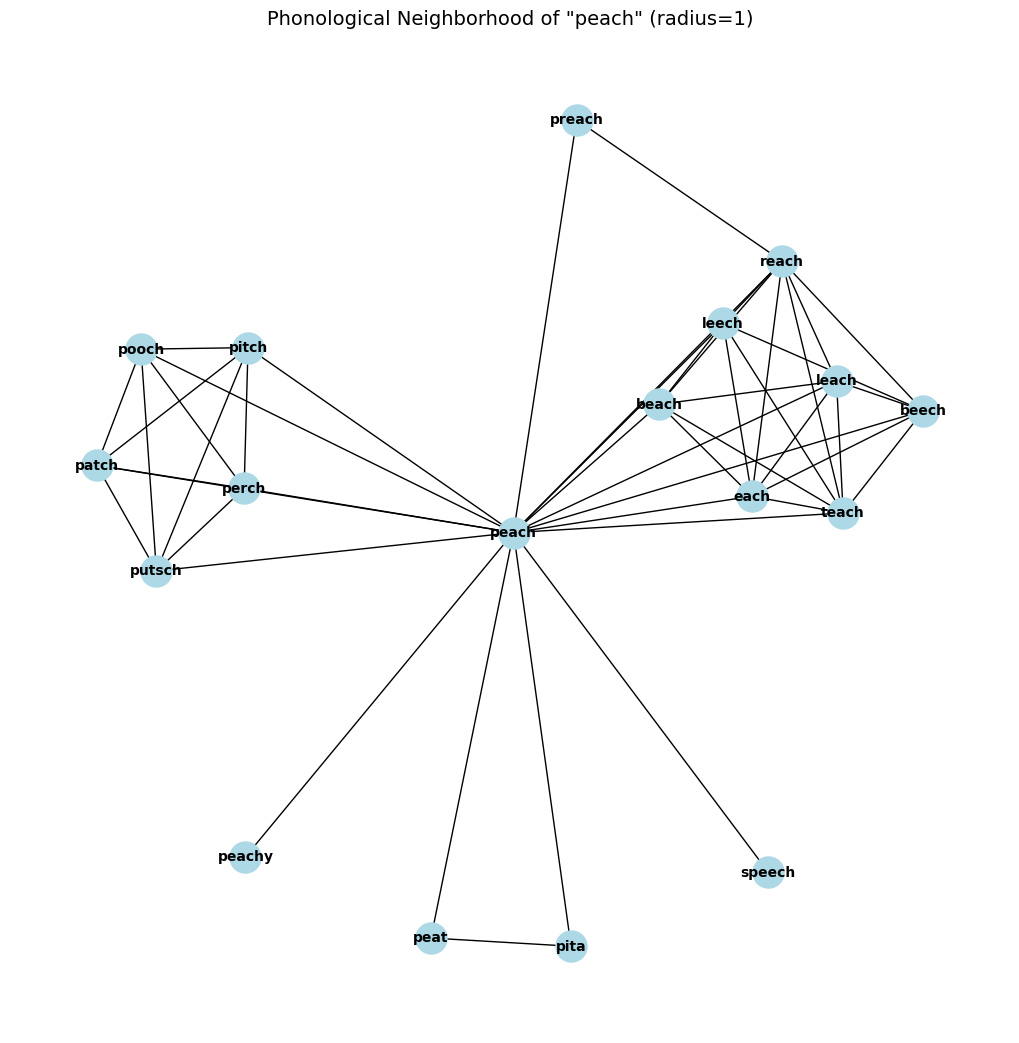

In [29]:
# visualize the neighborhood of word 'peach'

def visualize_neighborhood(G, word, radius=1):
    if word not in G:
        print(f'the word {word} is not in the graph')
        return

    neighborhood = nx.ego_graph(G, word, radius=radius)  # present also in social network (ego networks or graphs)

    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(neighborhood, seed=42) # Calculate the position of nodes in graph using sping layout algorithm -> plot the graph and create a dictionary of words with x, y coordinates -> Procedure to allocate words to space nodes -> Embedding
    nx.draw(neighborhood, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight="bold")  # This function plots the network, The label in this case is the name of the word
    plt.title(f'Phonological Neighborhood of "{word}" (radius={radius})', fontsize=14)
    plt.show()

# Visualize "peach" neighborhood
visualize_neighborhood(G, 'peach', radius=1)
